In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dill 
import sys
sys.path.append("../_dat/")
sys.path.append("../_src")
# dataset
import electronics
import utils as utils
from infinite_mixture_unigram import infinite_mixture_unigram 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# test electronics

In [2]:
toy_dataset = electronics.load_clean_data()

In [3]:
toy_dataset.columns

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id'],
      dtype='object')

In [4]:
toy_data = toy_dataset.loc[:,["event_time","category_code"]]
toy_data = toy_dataset.loc[:,["brand","category_code"]]

In [5]:
toy_data["brand"].nunique()

867

In [6]:
len(toy_data.groupby(["brand","category_code"]).count())

2018

In [7]:
toy_data.reset_index().loc[:1000]["category_code"].value_counts()


UNKNOWN                            334
electronics.smartphone              85
electronics.audio.headphone         42
furniture.kitchen.table             34
appliances.kitchen.kettle           32
                                  ... 
appliances.personal.hair_cutter      1
furniture.living_room.chair          1
kids.toys                            1
apparel.shirt                        1
auto.accessories.videoregister       1
Name: category_code, Length: 62, dtype: int64

In [8]:
toy_data.reset_index().loc[:].nunique()

index            562823
brand               867
category_code       124
dtype: int64

In [9]:
c_ind=["brand","category_code"]
a=utils.prepare_event_matrix(toy_dataset,c_ind)

                 event_time             order_id           product_id  \
56708   2020-01-05 04:01:46  2348708875558978111  2273948282625458240   
68120   2020-01-05 04:06:18  2348710347105370326  1515966223509088613   
64028   2020-01-05 04:09:00  2348709909622685923  1515966223509127621   
62027   2020-01-05 04:23:37  2348709663819694279  1515966223509283038   
68583   2020-01-05 04:35:21  2348710405431361995  1515966223509129592   
...                     ...                  ...                  ...   
2633516 2020-11-21 10:10:01  2388440981134693942  1515966223526602848   
2633517 2020-11-21 10:10:13  2388440981134693943  1515966223509089282   
2633518 2020-11-21 10:10:30  2388440981134693944  1515966223509089917   
2633519 2020-11-21 10:10:30  2388440981134693944  2273948184839454837   
2633520 2020-11-21 10:10:30  2388440981134693944  1515966223509127566   

          category_id                category_code     brand   price  \
56708    2.268105e+18                      UNKNOWN 

In [10]:
a=a[c_ind]

In [11]:
matrix_df = utils.prepare_event_matrix(
        toy_data,
        c_ind,
#         outdir=outputdir,
#         save_encoders=True,
    )

            brand                category_code
56708        none                      UNKNOWN
68120       apple  electronics.audio.headphone
64028    microlab           computers.notebook
62027    scarlett                      UNKNOWN
68583     samsung     construction.tools.screw
...           ...                          ...
2633516      oppo       electronics.smartphone
2633517     apple       electronics.smartphone
2633518     vitek   appliances.personal.scales
2633519  moulinex                      UNKNOWN
2633520   redmond   appliances.kitchen.blender

[562823 rows x 2 columns]
Index(['brand', 'category_code'], dtype='object')


In [12]:
matrix_df["category_code"].unique()

array([  0,  82,  59,  74,  34,   1,  89,  31,  26,  64,  88, 120,  16,
       100, 101,  58,  18,  63,  28,  93,  62,  14,  27,  47,  33,  99,
        98,  48,  49,  37,  90,  83,  24,  23,  91,  30,  55, 103,  61,
       121,  38, 102,  21,  25,  65,   4,  10,  20,  15,  19,  32, 122,
        45, 113,  29,  44,   5,  36,  11,  35,  80, 112, 110,  17,  46,
        12,  42,  50,  22,  56,  87,  57,  86,  94, 118,   8,   9,  96,
        54,  92, 104,  97, 108,  40, 123,  39,  66,  60,  51,  13,  69,
       114,  52,  79,  67,  95,  73,  81,  53, 106,  70,  84,  77,  68,
         7,  85, 119, 107,   3, 105,  76,  41, 115,  43,   2,  75, 111,
       116,  72,  71, 109, 117,  78,   6])

In [13]:
matrix_df.nunique()

brand            867
category_code    124
dtype: int64

In [14]:
matrix, tensor, vectorizer =utils.transform_event_tensor_to_document_count_vector(a,)

bow: 100%|██████████| 867/867 [00:00<00:00, 1930.94it/s]


[[13115    44    25 ...     2   150     8]
 [  292     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [   21     0     0 ...     0     0     0]
 [   84     0     0 ...     0     0     0]]
[557  44 503 685 676 758 454 655 575 170  92   0 243 807 373 141 717  21
 761  32  71 129  62 395 601 798 356 783 821 123 544 844 304 756 606 444
 787 363 525 697 664 618 366 208 641 585 704 486 616  85  20 793 337   1
 589 351 209  39 531 789 667 104 354 612 206 394 171 222 322 461 229 244
 375  42 190  99 280 249 451 594 809 275 739 505 305  80 538 796  86  43
 644 816 522 233 840 635 562 693 264 143  51 806 861   8 678 393 325 504
 242 116 539 595 491  45 162  75 493 214 383 122 309 487 448   9 326 811
 160  13 743 415 217 523 434 553  36 396 474 331 372 547 744 550 469 292
 572 831 640 235 767 350 250 308 633 192  40 320 851 297 646  69 781 336
 600 684 427 485  48 471 220 569 252 456  76 419  96 293 465 180  33 639
 227 3

In [15]:
mat_ = utils.transform_event_tensor_to_document(a,(a.max()+1).to_numpy(),"./",time_base=True)

In [16]:
mat_.shape

(867, 124)

In [17]:
matrix.shape

(867, 124)

In [18]:
lda = LatentDirichletAllocation(
        n_components=5,
#         max_iter 
        random_state=0
        )


In [19]:
rr=lda.fit_transform(matrix)

In [20]:
rr.shape

(867, 5)

In [21]:
rr

array([[0.29685149, 0.6280838 , 0.02504818, 0.025013  , 0.02500352],
       [0.05012272, 0.79974271, 0.05010026, 0.05002699, 0.05000732],
       [0.0071589 , 0.74130644, 0.23719599, 0.0071464 , 0.00719227],
       ...,
       [0.01542065, 0.93838673, 0.01541359, 0.01539232, 0.0153867 ],
       [0.00103546, 0.00110602, 0.00103462, 0.00103192, 0.99579198],
       [0.06683839, 0.73297317, 0.06680705, 0.06670447, 0.06667691]])

In [22]:
tt = lda.components_

In [23]:
tt.shape

(5, 124)

In [99]:
path="../_out/electronics/infinite_unigram/test/result.dill"
result, elapsed_time = dill.load(open(path,'rb'))

In [117]:
topic_dist = result.topic_dist
components_ = result.components_
hist_k_num_all = result.hist_k_num_all

In [118]:
hist_k_num_all=hist_k_num_all.flatten()[:,np.newaxis]

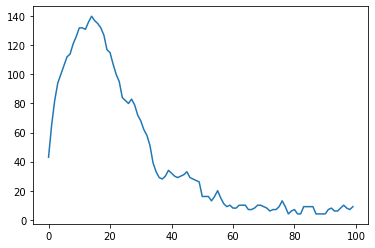

In [119]:
plt.plot(hist_k_num_all)

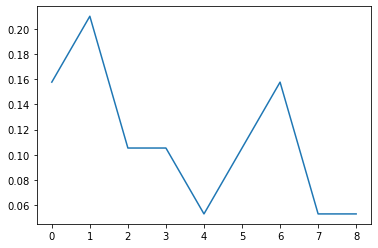

In [103]:
plt.plot(topic_dist)

In [104]:
topic_dist

array([0.15767417, 0.21005762, 0.10529073, 0.10529073, 0.05290728,
       0.10529073, 0.15767417, 0.05290728, 0.05290728])

In [105]:
components_.shape

(124, 9)

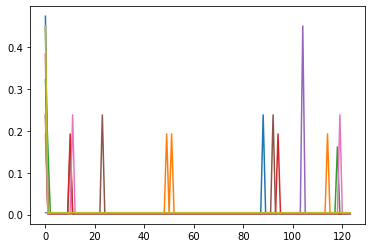

In [106]:
plt.plot(components_)

In [107]:
components_.sum()

9.0

In [108]:
components_

array([[0.4740566 , 0.19274809, 0.32211538, ..., 0.23820755, 0.45089286,
        0.45089286],
       [0.00235849, 0.0019084 , 0.16185897, ..., 0.00235849, 0.00446429,
        0.00446429],
       [0.00235849, 0.0019084 , 0.00160256, ..., 0.00235849, 0.00446429,
        0.00446429],
       ...,
       [0.00235849, 0.0019084 , 0.00160256, ..., 0.00235849, 0.00446429,
        0.00446429],
       [0.00235849, 0.0019084 , 0.00160256, ..., 0.00235849, 0.00446429,
        0.00446429],
       [0.00235849, 0.0019084 , 0.00160256, ..., 0.00235849, 0.00446429,
        0.00446429]])

In [109]:
result.counter_docs.sum()

867.0

In [110]:
result.counter_words.sum()

2018.0

In [111]:
len(result.bow[reuslt.bow>0])

2018

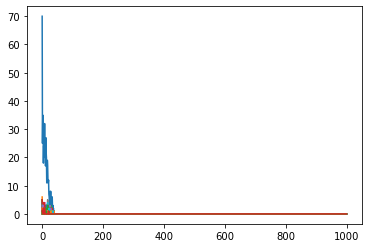

In [112]:
plt.plot(reuslt.counter_words.T)

In [113]:
reuslt.counter_words

array([[70., 25., 35., ...,  0.,  0.,  0.],
       [ 2.,  4.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 2.,  0.,  2., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.]])

In [114]:
k_orders = np.arange(len(result.k_index))
activated_topics = k_orders[result.k_index==1]
activated_topics

array([467, 472, 475, 476, 477, 478, 479, 480, 481])

In [115]:
result.counter_words[:,activated_topics].sum()

25.0